## still a draft
## maybe ok if correlation matrix has no nan
## coding style, try to follow rules

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"][0] = 12
#plt.rcParams["figure.figsize"][1] = 8

In [3]:
plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 6

In [4]:
## additional import

from sklearn.metrics import matthews_corrcoef
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
import gc
from tqdm import tqdm

/usr/bin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# import necessaries
#project into 3-dim with pca
from mpl_toolkits import mplot3d
#import matplotlib.pyplot as plt
from sklearn import decomposition

In [6]:
#data = pd.read_table("aps_failure_training_set.csv", header=None)
## customer
data = pd.read_csv("aps_failure_training_set.csv", skiprows=19)
data

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
5       neg   38312     na  2130706432    218      0      0      0      0   
6       neg      14      0           6     na      0      0      0      0   
7       neg  102960     na  2130706432    116      0      0      0      0   
8       neg   78696     na           0     na      0      0      0      0   
9       pos  153204      0         182     na      0      0      0      0   
10      neg   39196     na         204    170      0      0      0      0   
11      neg   45912     na           0    454      0      0      0      0   
12      neg    2104     na          36     26      0      0      0      0   
13      neg  118950     na        1390   1298      0      0      0      0   
14      neg   24416     na           0     na      0      0      0      0   
15      neg      14      0          62     34      0      0      0      0   
16      neg   31300      0         784    740      0      0      0      0   
17      neg     736      2          24     22     16     20      0      0   
18      neg     332     na  2130706432     20      0      0      0      0   
19      neg    1432     na  2130706440     82      0      0      0      0   
20      neg   41212      0  2130706434    104    104    172      0      0   
21      neg      14     na           6      6      0      0      0      0   
22      neg  157128     na  2130706456    424      0      0      0      0   
23      pos  453236     na        2926     na      0      0      0      0   
24      neg   58246     na  2130706432   2416      0      0      0      0   
25      neg   29394     na           0     na      0      0      0      0   
26      neg    8690     na         476    364      0      0      0      0   
27      neg   46978     na         334    322      0      0      0      0   
28      neg    1870     na          na     na      0      0      0      0   
29      neg   12516      0         120     na      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59970   neg      16      0           8     na      0      0      0      0   
59971   neg   39026     na         202    168      0      0      0      0   
59972   neg      14     na          24     20      0      0      0      0   
59973   neg    3248      8          16     10      0      0      0      0   
59974   neg   83818     na         552    532      0      0      0      0   
59975   neg   40274     na          98     94      0      0      0      0   
59976   neg   16978     na  2130706434   1750      0      0      0      0   
59977   neg   30320     na        1838   1278      0      0      0      0   
59978   neg   38414     na         888    758      0      0      0      0   
59979   neg      18      0  2130706432     18      0      0      0      0   
59980   neg     562      0           4      4      0      0      0      0   
59981   neg      16     na          20     20      0      0      0      0   
59982   neg   10628     na  2130706434     98      0      0      0      0   
59983   neg   39004     na          90     84      0      0      0      0   
59984   neg   33386     na         812    744      0      0      0      0   
59985   neg   10792     na         784    608      0      0      0      0   
59986   neg     644     na          12     na      0      0      0      0   
59987   neg   41330     na  2130706432    744      0      0      0      0   
59988   neg    6078     na          52     46      0      0      0      0   
59989   neg   61478     na         134      0      0      0      0      0   
59

In [7]:
## found string 'na'
## replace to Nan

dataTemp = data.replace(['na'], 
                        [np.nan])
dataTemp.head(10)


class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698    NaN  2130706438    280      0      0      0      0      0   
1   neg   33058    NaN           0    NaN      0      0      0      0      0   
2   neg   41040    NaN         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874    NaN        1368    458      0      0      0      0      0   
5   neg   38312    NaN  2130706432    218      0      0      0      0      0   
6   neg      14      0           6    NaN      0      0      0      0      0   
7   neg  102960    NaN  2130706432    116      0      0      0      0      0   
8   neg   78696    NaN           0    NaN      0      0      0      0      0   
9   pos  153204      0         182    NaN      0      0      0      0      0   

   ...     ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008 ee_009  \
0  ...    1240520  493384   721044   469792   339156  157956   73224      0   
1  ...     421400  178064   293306   245416   133654   81140   97576   1500   
2  ...     277378  159812   423992   409564   320746  158022   95128    514   
3  ...        240      46       58       44       10       0       0      0   
4  ...     622012  229790   405298   347188   286954  311560  433954   1218   
5  ...     388574  288278   900430   300412     1534     338     856      0   
6  ...        168      48       60       28        0       0       0      0   
7  ...     715518  384948   915978  1052166  1108672  341532  129504   7832   
8  ...     699290  362510  1190028  1012704   160090   63216   41202      4   
9  ...     129862   26872    34044    22472    34362       0       0      0   

  ef_000 eg_000  
0      0      0  
1      0      0  
2      0      0  
3      4     32  
4      0      0  
5      0      0  
6      0      0  
7      0      0  
8      0      0  
9      0      0  

[10 rows x 171 columns]

In [8]:
## check missing
dataTemp.isnull().any().any()


True

data.isnull().sum().sum()

In [9]:
Dim = len(dataTemp.columns)
print(Dim)

171


In [10]:
# type to float

dataTemp2 = dataTemp
dataTemp2.iloc[:, 1:Dim] = dataTemp.iloc[:, 1:Dim].astype(np.float)
dataTemp2.head(10)

class    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0   neg   76698.0     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1   neg   33058.0     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2   neg   41040.0     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3   neg      12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4   neg   60874.0     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
5   neg   38312.0     NaN  2.130706e+09   218.0     0.0     0.0     0.0   
6   neg      14.0     0.0  6.000000e+00     NaN     0.0     0.0     0.0   
7   neg  102960.0     NaN  2.130706e+09   116.0     0.0     0.0     0.0   
8   neg   78696.0     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
9   pos  153204.0     0.0  1.820000e+02     NaN     0.0     0.0     0.0   

   ag_001  ag_002   ...       ee_002    ee_003     ee_004     ee_005  \
0     0.0     0.0   ...    1240520.0  493384.0   721044.0   469792.0   
1     0.0     0.0   ...     421400.0  178064.0   293306.0   245416.0   
2     0.0     0.0   ...     277378.0  159812.0   423992.0   409564.0   
3     0.0     0.0   ...        240.0      46.0       58.0       44.0   
4     0.0     0.0   ...     622012.0  229790.0   405298.0   347188.0   
5     0.0     0.0   ...     388574.0  288278.0   900430.0   300412.0   
6     0.0     0.0   ...        168.0      48.0       60.0       28.0   
7     0.0     0.0   ...     715518.0  384948.0   915978.0  1052166.0   
8     0.0     0.0   ...     699290.0  362510.0  1190028.0  1012704.0   
9     0.0     0.0   ...     129862.0   26872.0    34044.0    22472.0   

      ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0   339156.0  157956.0   73224.0     0.0     0.0     0.0  
1   133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2   320746.0  158022.0   95128.0   514.0     0.0     0.0  
3       10.0       0.0       0.0     0.0     4.0    32.0  
4   286954.0  311560.0  433954.0  1218.0     0.0     0.0  
5     1534.0     338.0     856.0     0.0     0.0     0.0  
6        0.0       0.0       0.0     0.0     0.0     0.0  
7  1108672.0  341532.0  129504.0  7832.0     0.0     0.0  
8   160090.0   63216.0   41202.0     4.0     0.0     0.0  
9    34362.0       0.0       0.0     0.0     0.0     0.0  

[10 rows x 171 columns]

In [11]:
dataTemp2.describe()

## from informatin in Uci, features are anoymized QQ
## some categorical are conditions form bins

aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03  8.859128e+04   
std      209.792592  2.047846e+04  3.420053e+04  1.503220e+05  7.617312e+05   
min        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    20070.000000  3.376892e+06  4.109372e+06  1.055286e+07  6.340207e+07   

           ...             ee_002        ee_003        ee_004        ee_005  \
count      ...       5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean       ...       4.454897e+05  2.111264e+05  4.457343e+05  3.939462e+05   
std        ...       1.155540e+06  5.433188e+05  1.168314e+06  1.121044e+06   
min        ...       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        ...       2.936000e+03  1.166000e+03  2.700000e+03  3.584000e+03   
50%        ...       2.337960e+05  1.120860e+05  2.215180e+05  1.899880e+05   
75%        ...       4.383960e+05  2.182320e+05  4.666140e+05  4.032220e+05   
max        ...       7.793393e+07  3.775839e+07  9.715238e+07  5.743524e+07   

             ee_006        ee_007        ee_008        ee_009        ef_000  \
count  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04  57276.000000   
mean   3.330582e+05  3.462714e+05  1.387300e+05  8.388915e+03      0.090579   
std    1.069160e+06  1.728056e+06  4.495100e+05  4.747043e+04      4.368855   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%    5.120000e+02  1.100000e+02  0.000000e+00  0.000000e+00      0.000000   
50%    9.243200e+04  4.109800e+04  3.812000e+03  0.000000e+00      0.000000   
75%    2.750940e+05  1.678140e+05  1.397240e+05  2.028000e+03      0.000000   
max    3.160781e+07  1.195801e+08  1.926740e+07  3.810078e+06    482.000000   

             eg_000  
count  57277.000000  
mean       0.212756  
std        8.830641  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     1146.000000  

[8 rows x 170 columns]

In [12]:
## fill with mean?
## exclude label
dataTemp3 = dataTemp2.copy()
# dimension variable Dim ready
dataTemp3.iloc[:,1:Dim] = dataTemp2.iloc[:,1:Dim].apply(lambda x: x.fillna(x.mean()),axis=0)
dataTemp3.isnull().any().any()

False

In [13]:
## now load y label since need to drop 0th row

#y_temp = pd.read_csv('secom_labels.data.txt', sep=' ', header=None)
y_temp = dataTemp2.iloc[:, 0]


#y_temp = y_temp.drop([0,1])
y_temp.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

y_label = y_temp.iloc[:, 0]
y_label[ y_label == -1] = 0
y_label

In [14]:
y_temp.value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [15]:
## deal with string
N = len(y_temp)
y_label = np.zeros(N)
y_label[y_temp=='pos'] = 1

# y_label ready

In [16]:
## drop label here seems better
## drop label
dataTemp31 = dataTemp3.drop(['class'], axis=1)
dataTemp31.head()

aa_000    ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0     0.0   
1  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0     0.0   
2  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0     0.0   
3     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0     0.0   
4  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0     0.0   

   ag_001  ag_002  ag_003   ...       ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0   ...    1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0   ...     421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0   ...     277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0   318.0   ...        240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0   ...     622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 170 columns]

In [17]:
## drop std == 0 
STD_DES = dataTemp3.describe().loc['std']
zeros = np.where(STD_DES == 0)[0]
zeros

array([89])

In [18]:
dataTemp31.columns[zeros]

Index(['cd_000'], dtype='object')

In [19]:
dataTemp31.describe().iloc[:,zeros]

cd_000
count    60000.0
mean   1209600.0
std          0.0
min    1209600.0
25%    1209600.0
50%    1209600.0
75%    1209600.0
max    1209600.0

In [20]:
## drop
dataTemp4 = dataTemp31.drop(dataTemp31.columns[zeros], axis=1)
dataTemp4.head()

aa_000    ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0     0.0   
1  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0     0.0   
2  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0     0.0   
3     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0     0.0   
4  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0     0.0   

   ag_001  ag_002  ag_003   ...       ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0   ...    1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0   ...     421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0   ...     277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0   318.0   ...        240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0   ...     622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 169 columns]

In [21]:
## drop std == 0 
STD_DES = dataTemp4.describe().loc['std']
zeros = np.where(STD_DES == 0)[0]
zeros

array([], dtype=int64)

In [ ]:
## random sample data since too large
## from train test split?



In [ ]:
# ---------------- process --------------------

## import dataset

## recognize y_label
## X be dataFrame, y be series
## see if need reduce row with random sampling split

## deal with nan

## plotly to check distribution, see shape
### whole
## Laplacian, see best k from eigen gap(make function)
### clustered


In [ ]:
## see whole first


In [22]:
colors = ['rgb(55,126,184)','rgb(228,26,28)','rgb(77,175,74)']

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='tryout',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        #aspectmode = 'manual'        
    ),
)


In [23]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [24]:
def plotly_PCAproj_xy(X, y_label, 
                      names, colors, layout, 
                      n_comp = 3):

    Xtemp = X.values.copy()
    
    pca = decomposition.PCA(n_components=n_comp)
    pca.fit(Xtemp)
    # maybe can put separately
    Xpr = pca.transform(Xtemp)

    # for safety, using numpy tool after transform
    #y_temp = y.values.copy()
    
    #Xpr_n = Xpr[np.where(y_temp == 0)[0]]
    #Xpr_a = Xpr[np.where(y_temp == 1)[0]]
    
    ## running
    data = []

    for i in range(0, 2):
        # 0 normal 1 anomaly
        temp = X.loc[y_label == i]
        temp_now = pca.transform(temp)

        name = names
        color = colors[i]
        x = temp_now[:,0]
        y = temp_now[:,1]
        z = temp_now[:,2]

        trace = dict(
                name = name,
                x = x, y = y, z = z,
                type = "scatter3d",    
                mode = 'markers',
                marker = dict( size=2, color=color, line=dict(width=0) ) )
        data.append(trace)
    len(data)    
    # plot
    fig = dict(data=data, layout=layout)

    # IPython notebook
    iplot(fig, filename='implement', validate=False)

In [25]:
## optional
pStr = 'APS'

## get y_label
## may need transform to 0 1
# manuelly

dataX = dataTemp2.drop([1558], axis = 1)


y_temp = dataTemp2.iloc[:, 1558]
y_label = np.zeros(len(y_temp))
y_label[ y_temp == pStr ] = 1
## y ready

In [65]:
dataX = dataTemp4
y_current = y_label
# y_label ready

In [38]:
## random sample
selectIdx = np.random.choice(60000, 10000, replace=False)
selectIdx

array([ 5637, 46215, 36675, ..., 21690, 14182,  1552])

In [39]:
dataX = dataTemp4.iloc[selectIdx]
y_current = y_label[selectIdx]

In [40]:
## plot whole
names = 'SEC whole'
plotly_PCAproj_xy(dataX, y_current, 
                  names, colors, layout, 
                  n_comp=3)

In [30]:
def showLaplacian(currentData, pickN=100):
    tempW = currentData.corr().values
    weight_abs = abs(tempW)
    #w_abs
    plt.imshow(weight_abs)
    #show scale of colors
    plt.colorbar()
    plt.show()
    
    ## for correlation matrix, take normal only at first
    # plot out eigen gap first

    from scipy.sparse import csgraph

    ## note: from github, normalized Laplacian is symmetric

    Lsym = csgraph.laplacian(weight_abs, normed = True)

    # eigen decomposition
    from numpy import linalg as LA
    w, v = LA.eig(Lsym)
    sortW = np.sort(w) # no need order here

    ## plot out
    ## adjust plot parameter

    tempX = np.arange(len(sortW))+1

    plt.scatter(tempX, sortW)
    plt.plot(tempX, sortW)
    plt.show()
    
    
    ## plot eigen difference

    diffSortW = np.diff(sortW)

    tempX = np.arange(len(diffSortW))+1

    # bar plot
    plt.bar(tempX, diffSortW)
    plt.show()
    
    ## show top candidates of k choices
    ## see eigen gap, find from big to small
    ## just print out at first
    ## for i in diffSortW, means eigen i+1 - i
    ## but python start from 0, so add 1 
    rank0 = np.argsort(-diffSortW)
    rank = rank0[0:pickN]+1
    
    #print(rank0[0:pickN])
    print(rank)
    
    

    return weight_abs, diffSortW, rank

In [32]:
## take away y_label
currentData = dataX

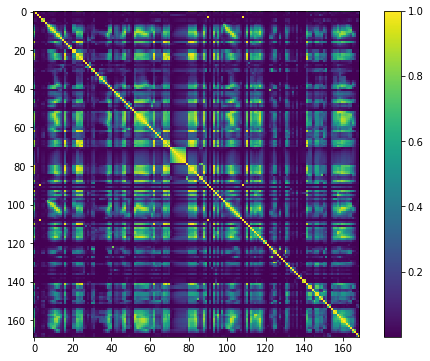

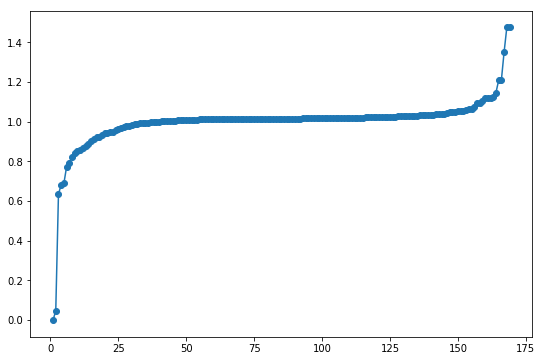

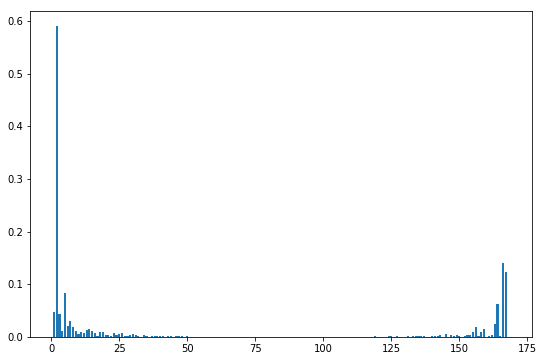

[  2 166 167   5 164   1   3   7 163   6   8 156  14 159  13  15   4   9
  11  18 155 158  19  16  23  12  26  10  25 145  30 153 162  24  21  20
 154  29 149 143 147  31  34 165 157  27  35  40  28 150  17  46 141  32
 152 142  22 148 134 124  37  38  39 137  50  41  43 140  44 131 127 133
 119  48 136  47 135 161 125  53  45 146 129  52 121 112 160  54  61 116
  51  59  49 126 110 115 139  55 138 113]


In [33]:
sPack = showLaplacian(currentData)
weight_abs = sPack[0]
diffSortW = sPack[1]
rank = sPack[2]

In [34]:
k = rank[3]
print(k)

5


In [35]:
from sklearn.cluster import spectral_clustering

# might have no choice to choose k = 2
labels = spectral_clustering(weight_abs, 
                             n_clusters=k, eigen_solver='arpack')

## get cluster index once and for all
feaNumArr = [None]*k
for clusKey in range(0, k):
    featureNum = np.where(labels == clusKey)[0]
    feaNumArr[clusKey] = featureNum
print(feaNumArr)

[array([  1,   4,   5,  31,  48,  63,  64,  65,  89, 125, 132, 136, 145,
       150, 152, 153, 167, 168]), array([  0,   9,  10,  11,  12,  13,  16,  22,  23,  24,  25,  38,  39,
        40,  46,  47,  52,  53,  54,  55,  56,  57,  58,  59,  60,  62,
        67,  68,  69,  70,  80,  81,  82,  83,  84,  88,  93,  95,  97,
       100, 101, 102, 103, 104, 105, 110, 112, 113, 114, 115, 116, 117,
       118, 130, 131, 141, 146, 147, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164]), array([71, 72, 73, 74, 75, 76, 77, 78]), array([139, 140]), array([  2,   3,   6,   7,   8,  14,  15,  17,  18,  19,  20,  21,  26,
        27,  28,  29,  30,  32,  33,  34,  35,  36,  37,  41,  42,  43,
        44,  45,  49,  50,  51,  61,  66,  79,  85,  86,  87,  90,  91,
        92,  94,  96,  98,  99, 106, 107, 108, 109, 111, 119, 120, 121,
       122, 123, 124, 126, 127, 128, 129, 133, 134, 135, 137, 138, 142,
       143, 144, 148, 149, 151, 154, 165, 166])]


In [189]:
import matplotlib.patches as patches

In [192]:
def reArrangeW(labels, currentData):
    ## show correlation matrix with rearrangement

    arrange = np.zeros(len(labels))
    idxH = 0
    # rearrenge
    for clusKey in range(0, k):
        featureNum = np.where(labels == clusKey)[0]

        idxE = idxH + len(featureNum)

        # become float type
        arrange[idxH:idxE] = featureNum

        #updata index
        idxH = idxE

        #print(arrange)

    # transform back to integer
    arrange = arrange.astype(int)
    
    # indexing with iloc
    reArrData = currentData.iloc[:, arrange]
    tempW = reArrData.corr().values
    weight_abs = abs(tempW)
    
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    
    
    #w_abs
    ax.imshow(weight_abs)
    #show scale of colors
    #plt.colorbar()
    
    
    ## add blocks here
    # Create a Rectangle patch
    ## adjust 0.5, by Yang (ˊ● ω ●ˋ)
    sPoint = np.zeros(2)-0.5
    for clusKey in range(0, k):
        featureNum = np.where(labels == clusKey)[0]
        width = len(featureNum)
        
        rect = patches.Rectangle(sPoint, width, width,linewidth=1,edgecolor='white',facecolor='none')
        ax.add_patch(rect)

        
        sPoint = sPoint + width
    plt.show()

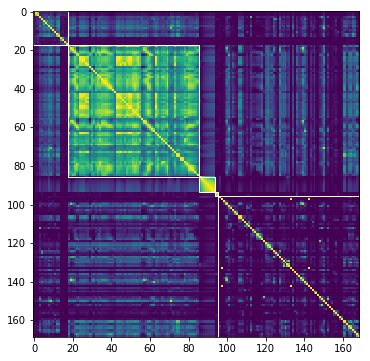

In [193]:
reArrangeW(labels, currentData)

In [ ]:
## import here


In [34]:
colors = ['rgb(55,126,184)','rgb(228,26,28)','rgb(77,175,74)']

In [35]:
layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='tryout',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        #aspectmode = 'manual'        
    ),
)


In [36]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## fix printout problem, refine rate_limit
## ref: https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-when-viewing-image-in-jupyter-notebook
## ref: 

In [37]:
## prepare list for plotly first
## deal with data inside function
## only plot one each time QQ

In [48]:
## define function
## plot both data and label
## using plotly for interactive

# x should be dataframe, y should be series or np array
# X: original, Xpr: projected

# no need title
def plotly_PCAproj_xy(X, y_label, 
                      names, colors, layout, 
                      n_comp = 3):

    Xtemp = X.values.copy()
    
    pca = decomposition.PCA(n_components=n_comp)
    pca.fit(Xtemp)
    # maybe can put separately
    Xpr = pca.transform(Xtemp)

    # for safety, using numpy tool after transform
    #y_temp = y.values.copy()
    
    #Xpr_n = Xpr[np.where(y_temp == 0)[0]]
    #Xpr_a = Xpr[np.where(y_temp == 1)[0]]
    
    ## running
    data = []

    for i in range(0, 2):
        # 0 normal 1 anomaly
        temp = X.loc[y_label == i]
        temp_now = pca.transform(temp)

        name = names
        color = colors[i]
        x = temp_now[:,0]
        y = temp_now[:,1]
        z = temp_now[:,2]

        trace = dict(
                name = name,
                x = x, y = y, z = z,
                type = "scatter3d",    
                mode = 'markers',
                marker = dict( size=2, color=color, line=dict(width=0) ) )
        data.append(trace)
    len(data)    
    # plot
    fig = dict(data=data, layout=layout)

    # IPython notebook
    iplot(fig, filename='implement', validate=False)
    
    
# 3-D plot
# X as dataFrame
# maybe no title first
def plotly_3D_xy(X, y_label, 
                 names, colors, layout):

    data = []

    for i in range(0, 2):
        # 0 normal 1 anomaly
        temp_now = X.loc[y_label == i].copy()
        print(i, len(temp_now), len(X))

        name = names
        color = colors[i]
        x = temp_now.iloc[:,0].values.copy()
        y = temp_now.iloc[:,1].values.copy()
        z = temp_now.iloc[:,2].values.copy()

        trace = dict(
                name = name,
                x = x, y = y, z = z,
                type = "scatter3d",    
                mode = 'markers',
                marker = dict( size=2, color=color, line=dict(width=0) ) )
        
        data.append(trace)  
    # plot
    fig = dict(data=data, layout=layout)

    # IPython notebook
    iplot(fig, filename='implement', validate=False)

    
## 2-D plot
# X as dataFrame
## for 2D, original plt is enough
def plot2D_xy(X, y):
    # normal
    Xpr_n = X.loc[y == 0].values.copy()
    # anomaly
    Xpr_a = X.loc[y == 1].values.copy()
    
    ax = plt.axes()

    
    plt.plot(Xpr_n[:,0], Xpr_n[:,1], 'co')
    plt.plot(Xpr_a[:,0], Xpr_a[:,1], 'ro')
    
    
    #plt.plot(Xpr[:,0], Xpr[:,1])
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()


## see if need to control n rows

In [39]:
tempY = y_label
tempY

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [42]:
## if random selected, in order to prevent out of memory
currentData = dataX
tempY = y_current

for clusKey in range(0, 10):
    featureNum = feaNumArr[clusKey]
    X = currentData.iloc[:, featureNum]
    
    print("Cluster ", clusKey)
    print(featureNum)
    if len(featureNum) > 3:
        print("PCA into 3 dim")
        plotly_PCAproj_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 3:
        print("3D plot")
        plotly_3D_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 2:
        plot2D_xy(X, tempY)
    else:
        print("In ", clusKey, ", only 1 dimension")

In [43]:
currentData.describe()

aa_000        ab_000        ac_000         ad_000        ae_000  \
count  1.000000e+04  10000.000000  1.000000e+04   10000.000000  10000.000000   
mean   5.834744e+04      0.703703  3.565504e+08   47498.198830      6.576565   
std    1.380211e+05      0.999540  7.740880e+08   82094.405695     80.135177   
min    0.000000e+00      0.000000  0.000000e+00       0.000000      0.000000   
25%    8.800000e+02      0.713189  1.800000e+01      44.000000      0.000000   
50%    3.098600e+04      0.713189  1.900000e+02     292.000000      0.000000   
75%    4.966900e+04      0.713189  1.624500e+03    7981.000000      0.000000   
max    2.220448e+06     52.000000  2.130707e+09  190620.639314   2572.000000   

             af_000         ag_000        ag_001        ag_002        ag_003  \
count  10000.000000   10000.000000  1.000000e+04  1.000000e+04  1.000000e+04   
mean      10.973473      85.924218  8.089656e+02  7.761520e+03  8.175575e+04   
std      162.696879    3587.540029  2.312422e+04  1.227618e+05  6.698831e+05   
min        0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
50%        0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
75%        0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
max     9040.000000  278514.000000  1.909708e+06  5.839902e+06  2.904730e+07   

           ...             ee_002        ee_003        ee_004        ee_005  \
count      ...       1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean       ...       4.372986e+05  2.063998e+05  4.370666e+05  3.945847e+05   
std        ...       1.041475e+06  4.737206e+05  1.017440e+06  1.145127e+06   
min        ...       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        ...       3.291000e+03  1.307000e+03  3.041500e+03  4.517500e+03   
50%        ...       2.462300e+05  1.181470e+05  2.341290e+05  1.995060e+05   
75%        ...       4.454897e+05  2.186065e+05  4.663140e+05  4.035375e+05   
max        ...       2.015004e+07  9.753888e+06  2.119694e+07  4.792389e+07   

             ee_006        ee_007        ee_008        ee_009        ef_000  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  10000.000000   
mean   3.283724e+05  3.279924e+05  1.423564e+05  8.643377e+03      0.073949   
std    1.042082e+06  1.555065e+06  4.496062e+05  4.359521e+04      3.808351   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%    5.940000e+02  1.440000e+02  0.000000e+00  0.000000e+00      0.000000   
50%    1.066990e+05  4.666700e+04  5.090000e+03  0.000000e+00      0.000000   
75%    2.879630e+05  1.751900e+05  1.445095e+05  2.649000e+03      0.000000   
max    3.160781e+07  4.304263e+07  1.456059e+07  1.695086e+06    350.000000   

             eg_000  
count  10000.000000  
mean       0.272076  
std       11.940947  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     1146.000000  

[8 rows x 169 columns]

In [ ]:
for clusKey in range(0, k):
    featureNum = feaNumArr[clusKey]
    X = currentData.iloc[:, featureNum]
    
    print("Cluster ", clusKey)
    print(featureNum)
    if len(featureNum) > 3:
        print("PCA into 3 dim")
        plotly_PCAproj_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 3:
        print("3D plot")
        plotly_3D_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 2:
        plot2D_xy(X, tempY)
    else:
        print("In ", clusKey, ", only 1 dimension")

tempY = y_train['Response']

In [ ]:
## do manuelly
## copy cluster elements

featureNum = np.array([22, 23, 25, 26, 27])

In [ ]:
## cluster 10(?): 22 23 25 26 27

In [ ]:
str(featureNum)

In [40]:
names = 'APS whole'

In [55]:
clusKey = 1
#X = X_train.iloc[:, featureNum]
featureNum = feaNumArr[clusKey]

X = currentData.iloc[:, featureNum]
#tempY = y_label[idxT]
    
#print("Cluster ", clusKey)
print(featureNum)
if len(featureNum) > 3:
    print("PCA into 3 dim")
    plotly_PCAproj_xy(X, tempY, names, colors, layout)
elif len(featureNum) == 3:
    print("3D plot")
    plotly_3D_xy(X, tempY, names, colors, layout)
elif len(featureNum) == 2:
    plot2D_xy(X, tempY)
else:
    print("In ", clusKey, ", only 1 dimension")

[  0   9  10  11  12  13  16  22  23  24  25  38  39  40  46  47  52  53
  54  55  56  57  58  59  60  62  67  68  69  70  80  81  82  83  84  88
  93  95  97 100 101 102 103 104 105 110 112 113 114 115 116 117 118 130
 131 141 146 147 155 156 157 158 159 160 161 162 163 164]
PCA into 3 dim


## experiments

In [57]:
def Track_w(x, w, d, beta):
    y = x.dot(w)
    d = beta*d + y*y
    e = x- y*w
    wNew = w + (y/d)*e
    return wNew, d

In [58]:
#becareful shape of sim_pool


def OD_onlinePCA_m(A, beta):
    #here A is 2-dim array
    
    #row, col of A
    n, p = A.shape
    
    A_m = np.mean(A, axis = 0)
    d = 0.0001
    u = np.ones(p)
    
    for i in tqdm(range(0, n)):
        u ,d = Track_w(A[i,:]-A_m, u, d, 1)
    #end
    u = u/np.linalg.norm(u)
    
    sim_pool = np.zeros(n)
    ratio = 1/(n*beta)
    
    for i in tqdm(range(0,n)):
        temp_mu = (A_m + ratio*A[i,:])/ (1+ratio)
        x = A[i, :] - temp_mu
        
        w1, d1 = Track_w(x, u, d, beta)
        w1 = w1/ np.linalg.norm(w1)
        
        sim_pool[i] = abs(u.dot(w1) )
        
        #if i%10000 == 0:
            #print('iteration '+ str(i))
        
    #end

    suspicious_index = np.argsort(sim_pool)
    suspicious_score = 1-sim_pool
    
    return suspicious_index, suspicious_score, u, d

In [59]:
#becareful shape of sim_pool

#suspicious_index: turn order accending original index into rank array

def OD_onlinePCA_forget(A, beta, ini_For):
    #here A is 2-dim array
    
    #row, col of A
    n, p = A.shape
    
    A_m = np.mean(A, axis = 0)
    d = 0.0001
    u = np.ones(p)
    
    for i in tqdm(range(0, n)):
        u ,d = Track_w(A[i,:]-A_m, u, d, ini_For)
        #
        #print(u)
    #end
    u = u/np.linalg.norm(u)
    
    
    sim_pool = np.zeros(n)
    ratio = 1/(n*beta)
    
    for i in tqdm(range(0,n)):
        temp_mu = (A_m + ratio*A[i,:])/ (1+ratio)
        x = A[i, :] - temp_mu
        
        w1, d1 = Track_w(x, u, d, beta)
        w1 = w1/ np.linalg.norm(w1)
        
        sim_pool[i] = abs(u.dot(w1) )
        
        #if i%10000 == 0:
            #print('iteration '+ str(i))
        
    #end
    
    suspicious_index = np.argsort(sim_pool)
    suspicious_score = 1-sim_pool
    
    return suspicious_index, suspicious_score, u, d

In [60]:
## cleaning by droping top t%, remain top as threshold, via OD_onlinePCA_m
# drop with whole data, and clusterd data(k results)
# show threshold

# construct function since need implements many times

def cleanPCA(A, sRate, beta, ini_For = 1, drop_rate_t = 0.05):
    suspicious_index, suspicious_score, u, d = OD_onlinePCA_forget(A, beta, ini_For)
    
    #
    u0 = u
    
    #drop top t data, suspicious_index descending order
    print("A.shape[1] ", A.shape[1])
    dropN = int(A.shape[0]*drop_rate_t)
    
    cleanIdx = suspicious_index[dropN:len(suspicious_index)]
    cleanA = A[cleanIdx, :]
    
    print(dropN, cleanA.shape[0])
    
    #just check
    print(suspicious_score[suspicious_index])
    
    #print threshold, before deleting top datas
    # threshold = suspicious_score[cleanIdx[0]]
    
    #last from dropped
    threshold = suspicious_score[suspicious_index[dropN-1]]
    print("Threshold: ", threshold)
    
    
    
    
    #get new u
    betaR = 1/(sRate*cleanA.shape[0])
    suspicious_index, suspicious_score, u, d = OD_onlinePCA_forget(cleanA, betaR, ini_For)
    
    cleanCos = abs(u.dot(u0))
    print(cleanCos)
    # return pca from clean data, return threshold, new beta
    return u, d, threshold, betaR, cleanCos 

In [61]:
def detectScore(x, u, d, betaR):
    newU, newD = Track_w(x, u, d, betaR)
    
    newU = newU / np.linalg.norm(newU)
    score = 1 - abs(u.dot(newU))
    
    return score
    

In [62]:
#detecting

## test ready

# return 01 array, 1 as anomaly
def test_pca(testA, u, d, betaR, threshold, UPDATE = True, upFor = 1):
    N = testA.shape[0]
    result = np.zeros(N)
    
    u0 = np.copy(u)
    d0 = np.copy(d)
    
    for i in tqdm(range(0, N)):
        x = testA[i, :]
        #scoring
        score = detectScore(x, u0, d0, betaR)
        
        #print(score)
        
        #check threshold
        if score >= threshold:
            result[i] = 1
        else:
            # regarded it as normal
            # update if needed
            if UPDATE:
                newU, newD = Track_w(x, u0, d0, upFor)
                
                u0 = newU / np.linalg.norm(newU)
                d0 = newD
            
        
    #end for
    
    
    return result



In [88]:
## multiple cleaning

def cleanPCA_mul(feaNumArr, k, A, sRate, beta, ini_For = 1, drop_rate_t = 0.05):
    
    uArr = [None]*k
    dArr = np.zeros(k)
    thresholdArr = np.zeros(k)
    cleanCosArr = np.zeros(k)
    # betaR should be the same for all clusters
    
    # A already an array
    
    for clusKey in range(0, k):
        featureNum = feaNumArr[clusKey]
        tempA = A[:, featureNum]
        u, d, threshold, betaR, cleanCos = cleanPCA(tempA, sRate, beta, ini_For, drop_rate_t)
        
        uArr[clusKey] = u
        dArr[clusKey] = d
        thresholdArr[clusKey] = threshold
        cleanCosArr[clusKey] = cleanCos
        
    #maybe return objects, only uArr faced problem
    return uArr, dArr, thresholdArr, betaR, cleanCosArr


In [89]:
## scoring strategies for multiple clusters

# input scoringTable, thresholdArray, strategy(categorial variable)
# output boolean, if alert or not


def judgeAlert(scoringArr, thresholdArr, strategy):
    anomaly = False
    
    MAX = 0
    AVG = 1
    ANY = 2
    
    if strategy == MAX:
        score = np.max(scoringArr)
        threshold = np.max(thresholdArr)
        if score >= threshold:
            anomaly = True
        else :
            anomaly = False
        
    elif strategy == AVG:
        score = np.mean(scoringArr)
        threshold = np.mean(thresholdArr)
        if score >= threshold:
            anomaly = True
        else :
            anomaly = False
        
    elif strategy == ANY:
        k = len(thresholdArr)
        #print("k: ", k)
        for i in range(0, k):
            if scoringArr[i] >= thresholdArr[i]:
                anomaly = True
                #print(i, scoringArr[i], thresholdArr[i])
        #end for i
    

    
    return anomaly

In [90]:
# for multiple clustering, deciding scoring strategies
# detecting

## test ready

# return 01 array, 1 as anomaly
def test_pca_mul(feaNumArr, k, strategy, testA, uArr, dArr, betaR, thresholdArr, UPDATE = True, upFor = 1):
    N = testA.shape[0]
    result = np.zeros(N)
    
    uArr0 = np.copy(uArr)
    dArr0 = np.copy(dArr)
    
    for i in tqdm(range(0, N)):
        x = testA[i, :]
        
        scoringArr = np.zeros(k)
        xprArr = [None]*k
        for clusKey in range(0, k):
            #scoring
            featureNum = feaNumArr[clusKey]
            xpr = x[featureNum]
            xprArr[clusKey] = xpr
            
            u0 = uArr0[clusKey]
            d0 = dArr0[clusKey]
            
            score = detectScore(xpr, u0, d0, betaR)
            scoringArr[clusKey] = score
            
            #print(clusKey, score)            
        #end for clusKey
        
        # strategy variables, categorical
        anomaly = judgeAlert(scoringArr, thresholdArr, strategy)
        
        # check bool variables
        if anomaly:
            result[i] = 1
        else:
            # regarded it as normal
            # update if needed
            if UPDATE:
                # update each clusters
                for clusKey in range(0, k):
                    xpr = xprArr[clusKey]
                    u0 = uArr0[clusKey]
                    d0 = dArr0[clusKey]
                    newU, newD = Track_w(xpr, u0, d0, upFor)

                    u0 = newU / np.linalg.norm(newU)
                    d0 = newD
                    
                    uArr0[clusKey] = u0
                    dArr0[clusKey] = d0
            
        
    #end for
    
    
    return result



In [92]:
## function for dropping bad cluster

def checkCluster(thresholdArr, BDD):
    fineClus = np.where(thresholdArr >= BDD)[0]
    
    return fineClus

In [91]:
# for multiple clustering, deciding scoring strategies
# detecting

## test ready

# return 01 array, 1 as anomaly
def test_pca_mul_select(fineClus, feaNumArr, k, strategy, testA, uArr, dArr, betaR, thresholdArr, UPDATE = True, upFor = 1):
    N = testA.shape[0]
    result = np.zeros(N)
    
    uArr0 = np.copy(uArr)
    dArr0 = np.copy(dArr)
    
    for i in tqdm(range(0, N)):
        x = testA[i, :]
        
        scoringArr = np.zeros(k)
        xprArr = [None]*k
        for clusKey in fineClus:
            #scoring
            featureNum = feaNumArr[clusKey]
            xpr = x[featureNum]
            xprArr[clusKey] = xpr
            
            u0 = uArr0[clusKey]
            d0 = dArr0[clusKey]
            
            score = detectScore(xpr, u0, d0, betaR)
            scoringArr[clusKey] = score
            
            #print(clusKey, score)            
        #end for clusKey
        
        # strategy variables, categorical
        anomaly = judgeAlert(scoringArr[fineClus], thresholdArr[fineClus], strategy)
        
        # check bool variables
        if anomaly:
            result[i] = 1
        else:
            # regarded it as normal
            # update if needed
            if UPDATE:
                # update each clusters
                for clusKey in fineClus:
                    xpr = xprArr[clusKey]
                    u0 = uArr0[clusKey]
                    d0 = dArr0[clusKey]
                    newU, newD = Track_w(xpr, u0, d0, upFor)

                    u0 = newU / np.linalg.norm(newU)
                    d0 = newD
                    
                    uArr0[clusKey] = u0
                    dArr0[clusKey] = d0
            
        
    #end for
    
    
    return result



In [66]:
currentData = dataX

In [74]:
# y_label need back to series
## also bring back index

X_index = dataX.index

y_Series = pd.Series(y_label, index=X_index)
y_Series.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [72]:
currentData.head()

aa_000    ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0     0.0   
1  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0     0.0   
2  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0     0.0   
3     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0     0.0   
4  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0     0.0   

   ag_001  ag_002  ag_003   ...       ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0   ...    1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0   ...     421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0   ...     277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0   318.0   ...        240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0   ...     622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 169 columns]

In [75]:
## do train test split in X
# split already imported
X_train, X_test, y_train, y_test = train_test_split(currentData, y_Series, test_size = 0.5)

In [197]:
y_train.value_counts()

0.0    29481
1.0      519
dtype: int64

In [199]:
y_test.value_counts()

0.0    29519
1.0      481
dtype: int64

In [85]:
y_true = y_test

In [77]:
FailIdx = y_train.loc[ y_train == 1].index
FailIdx

Int64Index([ 1257, 24431, 25521, 24275, 17448, 52717, 44183, 23763,  2039,
            28449,
            ...
            54098, 44113, 27853,  6261, 37731, 53094, 46771, 16328, 22469,
            24687],
           dtype='int64', length=519)

In [78]:
## get fail from y_train
FailIdx = y_train.loc[y_train == 1].index.values
norY = y_train.drop(FailIdx, axis = 0)
norY.describe()

count    29481.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

In [79]:
X_nor = X_train.drop(FailIdx, axis = 0)

In [80]:
## whole
A = X_nor.astype(float).values.copy()
A.shape

(29481, 169)

In [171]:
sRate = 0.3
beta = 1/(sRate*len(X_train))
dropRateT = 0.02

In [144]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [187]:
## put tqdm in pca
A = X_nor.astype(float).values.copy()


u, d, threshold, betaR, cleanCos = cleanPCA(A, sRate, beta, ini_For = 1, drop_rate_t = dropRateT)

print('--------------------')



#get y_labels
testA = X_test.astype(float).values.copy()

# detecting
## with check if all time nan in row, answer normal
## ignore it first, since only few hundred
result = test_pca(testA, u, d, betaR, threshold)


tn, fp, fn, tp = confusion_matrix(y_true, result).ravel()

# ref: https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
print('tpr: ', tp/(tp+fn), ', fpr: ', fp/(tn+fp))
pd.crosstab(y_true, result ,rownames=['True'], colnames=['Predicted'], margins=True)

 40%|███▉      | 11465/28892 [00:00<00:00, 114623.05it/s]

A.shape[1]  169
589 28892
[  4.55822175e-01   7.53981228e-03   5.62342523e-03 ...,  -2.22044605e-16
  -2.22044605e-16  -2.22044605e-16]
Threshold:  7.44013690488e-05


 15%|█▍        | 4469/30000 [00:00<00:00, 44678.43it/s]

0.999999268293
--------------------


100%|██████████| 30000/30000 [00:00<00:00, 43560.18it/s]


tpr:  0.384615384615 , fpr:  0.0191063382906


Predicted    0.0  1.0    All
True                        
0.0        28955  564  29519
1.0          296  185    481
All        29251  749  30000

In [87]:
## clustered

In [95]:
k

5

In [173]:
currentTrain = X_nor.astype(float)
tempTrainA = currentTrain.values.copy()

## can't deal with A array 
## need new A since dimension may changed
uArr, dArr, thresholdArr, betaR, cleanCosArr =cleanPCA_mul(feaNumArr, k, tempTrainA, sRate, beta, ini_For = 1,drop_rate_t = dropRateT)

  0%|          | 0/28892 [00:00<?, ?it/s]

A.shape[1]  18
589 28892
[  5.76844162e-01   5.02816737e-01   4.34883006e-01 ...,   3.08153503e-12
   2.63389310e-12   6.42375042e-13]
Threshold:  0.00942466250463


 39%|███▊      | 11409/29481 [00:00<00:00, 114068.08it/s]

0.997972975995


 52%|█████▏    | 14958/28892 [00:00<00:00, 149560.53it/s]

A.shape[1]  68
589 28892
[  5.22698340e-01   4.07809675e-01   3.85426250e-01 ...,   7.26718685e-12
   7.00284275e-12   8.20121748e-13]
Threshold:  0.022545127831


 45%|████▌     | 13344/29481 [00:00<00:00, 133415.32it/s]

0.998515269333


  0%|          | 0/28892 [00:00<?, ?it/s]

A.shape[1]  8
589 28892
[  8.56069316e-02   8.53558029e-02   8.51203585e-02 ...,   3.86746191e-12
   3.57092134e-12   4.76507722e-13]
Threshold:  0.0261273969975


 40%|████      | 11929/29481 [00:00<00:00, 119277.89it/s]

0.997948680569


  0%|          | 0/28892 [00:00<?, ?it/s]

A.shape[1]  2
589 28892
[  2.17231769e-01   4.12328990e-02   3.25397303e-02 ...,   1.87627691e-14
   5.88418203e-15   3.55271368e-15]
Threshold:  1.84469106657e-11


 41%|████      | 12120/29481 [00:00<00:00, 121180.47it/s]

0.996521102751


 51%|█████     | 14801/28892 [00:00<00:00, 147990.03it/s]

A.shape[1]  73
589 28892
[  4.55826152e-01   7.40495486e-03   5.42543434e-03 ...,  -4.44089210e-16
  -4.44089210e-16  -4.44089210e-16]
Threshold:  4.68733986291e-05


100%|██████████| 28892/28892 [00:00<00:00, 64462.60it/s]

0.999999522948


In [174]:
thresholdArr

array([  9.42466250e-03,   2.25451278e-02,   2.61273970e-02,
         1.84469107e-11,   4.68733986e-05])

In [175]:
BDD = 0.001
fineClus = checkCluster(thresholdArr, BDD)
fineClus

array([0, 1, 2])

In [185]:
#deg = 15
#rad = np.deg2rad(deg)
#BDD = np.cos(rad)


MAX = 0
AVG = 1
ANY = 2
strategy = ANY

## reorderTrain, reorderTest ready
## using same sampleRate, beta
## using same clean drop rate

In [188]:
## fix some reference names

tempTest = X_test

currentTest = tempTest

testClusA = currentTest.astype(float).values.copy()



resultFineClus = test_pca_mul_select(fineClus, feaNumArr, k, strategy, testClusA, uArr, dArr, betaR, thresholdArr)


tn, fp, fn, tp = confusion_matrix(y_true, resultFineClus).ravel()

# ref: https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
print('tpr: ', tp/(tp+fn), ', fpr: ', fp/(tn+fp))
pd.crosstab(y_true, resultFineClus, rownames=['True'], colnames=['Predicted'], margins=True)

100%|██████████| 30000/30000 [00:02<00:00, 14471.94it/s]

tpr:  0.806652806653 , fpr:  0.0779836715336


Predicted    0.0   1.0    All
True                         
0.0        27217  2302  29519
1.0           93   388    481
All        27310  2690  30000